# Data Loader

In [1]:
import numpy as np
from moabb.datasets import BNCI2014002
import pandas as pd
import mne
from moabb.paradigms import  MotorImagery

%matplotlib inline

In [2]:
paradigm = MotorImagery(n_classes=2)
dataset = BNCI2014002()
subjects = [1]

X, y, metadata = paradigm.get_data(dataset=dataset, subjects=subjects)

Choosing from all possible events


In [3]:
y

array(['right_hand', 'right_hand', 'feet', 'feet', 'feet', 'feet',
       'right_hand', 'feet', 'right_hand', 'right_hand', 'feet',
       'right_hand', 'right_hand', 'feet', 'right_hand', 'feet', 'feet',
       'right_hand', 'feet', 'right_hand', 'feet', 'feet', 'right_hand',
       'right_hand', 'right_hand', 'feet', 'feet', 'right_hand', 'feet',
       'feet', 'feet', 'right_hand', 'right_hand', 'feet', 'right_hand',
       'right_hand', 'feet', 'right_hand', 'right_hand', 'feet', 'feet',
       'right_hand', 'right_hand', 'feet', 'feet', 'right_hand', 'feet',
       'feet', 'right_hand', 'right_hand', 'feet', 'right_hand',
       'right_hand', 'feet', 'right_hand', 'feet', 'feet', 'right_hand',
       'right_hand', 'feet', 'right_hand', 'right_hand', 'right_hand',
       'feet', 'feet', 'feet', 'feet', 'right_hand', 'feet', 'right_hand',
       'feet', 'right_hand', 'feet', 'right_hand', 'right_hand', 'feet',
       'feet', 'right_hand', 'feet', 'right_hand', 'right_hand', 'feet',


In [7]:
import csv

Y = [int(0) if i == 'right_hand' else int(1) for i in y]
with open('labels.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(Y)

In [3]:
dataset.subject_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [4]:
Y = y.tolist()
print('Feet: ', Y.count('feet'))
print('Right-hand: ', Y.count('right_hand'))

Feet:  80
Right-hand:  80


In [5]:
metadata

,subject,session,run
0,1,session_0,run_0
1,1,session_0,run_0
2,1,session_0,run_0
3,1,session_0,run_0
4,1,session_0,run_0
...,...,...,...
155,1,session_0,run_7
156,1,session_0,run_7
157,1,session_0,run_7
158,1,session_0,run_7


In [17]:
new_X.shape

(160, 15, 2560)

In [32]:
dataset = BNCI2014002()
paradigm = MotorImagery(n_classes=2)

def get_raw(dataset, paradigm, n_channels, sfreq):
    '''
    Takes a dataset from moabb datasets and creates 3 dictionaries with subject number as keys and X matrix, y labels and metadata
    as dictionary values respectively.
    X: Original 3D data matrix (num_cases, n_channels, lectures) is reshaped to 2D matrix (len(num_cases)*len(lectures),len(n_channels))
    y: This array corresponds with the class for each case. It has num_cases length.
    metadata: Describes each subject
    '''
    
    subjects_all = dataset.subject_list
    channels = [str(a+1) for a in range(n_channels)]
    

    X_all_subjects = {}
    y_all_subjects = {}
    metadata_all_subjects = {}
    
    for subject in subjects_all:
        
        X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[subject])
        X = np.delete(X, -1,axis = 2)
        X_2d = X.reshape(n_channels,(X.shape[0]*X.shape[2]))
        data_mne = X_2d
        data_mne = data_mne / 1000000      
                        
        info_mne = mne.create_info(
            ch_names=channels,
            ch_types='eeg',
            sfreq=sfreq)
        
        raw = mne.io.RawArray(data_mne, info_mne)
        #ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
        #raw_1020 = raw.copy().set_montage(ten_twenty_montage)

        X_all_subjects.update({str(subject):raw})
        y_all_subjects.update({str(subject):y})
        metadata_all_subjects.update({str(subject):metadata})
        
    return X_all_subjects, y_all_subjects, metadata_all_subjects
        
        
X_all_subjects, y_all_subjects, metadata_all_subjects = get_raw(dataset, paradigm, 15, 512)

print(X_all_subjects)
    
    

Choosing from all possible events
/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ... 409599 =      0.000 ...   799.998 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=409600
    Range : 0 ..

In [33]:
X_all_subjects

{'1': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '2': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '3': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '4': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '5': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '6': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '7': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '8': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '9': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '10': <RawArray  |  None, n_channels x n_times : 15 x 409600 (800.0 sec), ~46.9 MB, data loaded>,
 '11': <RawArray  |

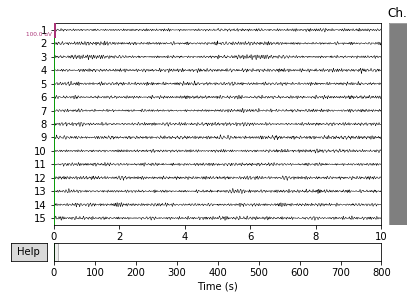

In [36]:
# Way to acces an specific subject
subject_i = X_all_subjects['3']
plot_fig = subject_i.plot(scalings = 0.5e-4)

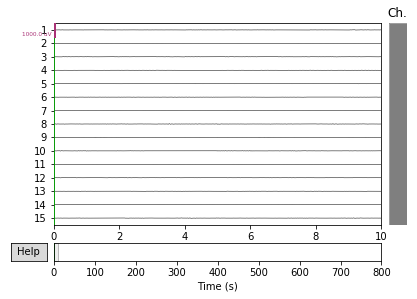

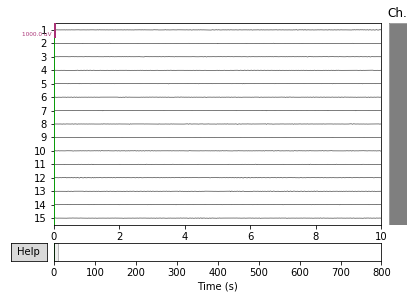

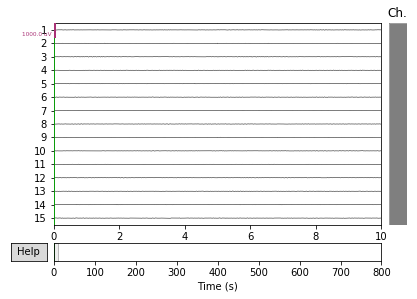

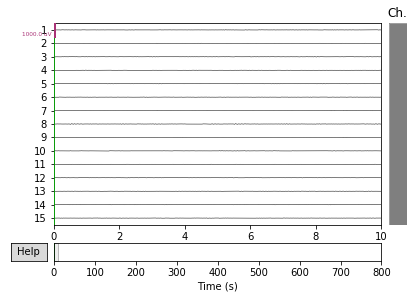

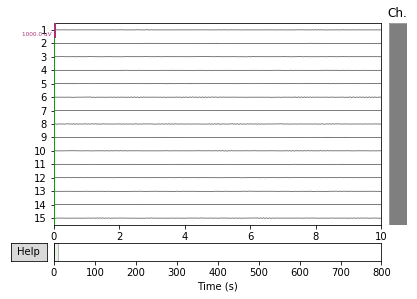

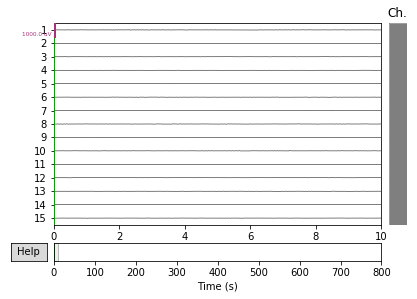

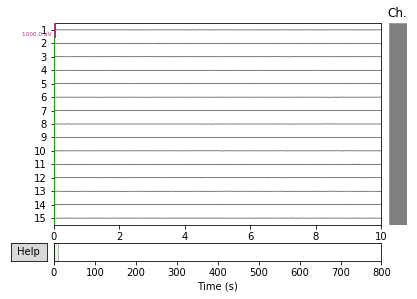

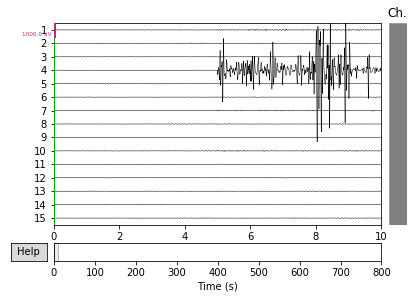

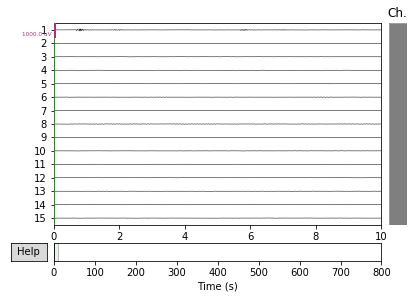

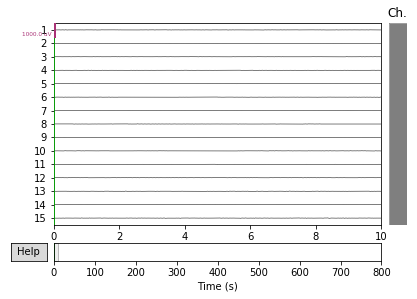

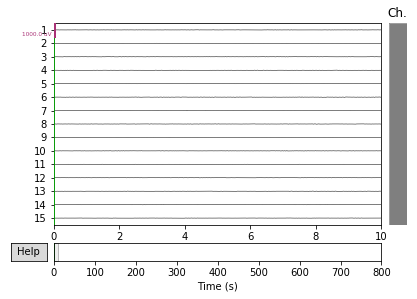

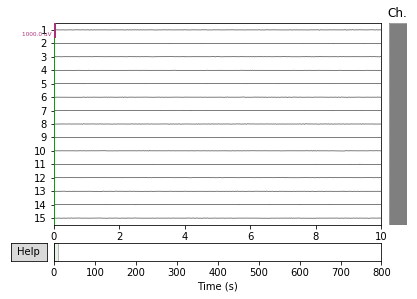

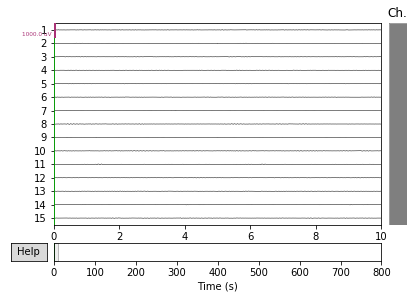

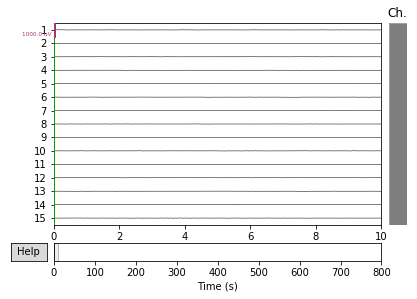

In [40]:
# Way to iterate among the dictionary with all subjects

for k,v  in X_all_subjects.items():
    plot_fig = v.plot(scalings = 0.5e-3)

In [38]:
#Para pasar a .fif

path = '../data/vendor/bnci-002-2014'
for k,v  in X_all_subjects.items():
    v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)

Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-1.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-1.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-2.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-2.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-3.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-3.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-4.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-4.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-5.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-5.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-6.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-6.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-7.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-7.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-8.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-8.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-9.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-9.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-10.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-10.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-11.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-11.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-12.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-12.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-13.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-13.fif [done]
Overwriting existing file.
Writing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-14.fif


<ipython-input-38-c5da1c9e6e2c>:5: RuntimeWarning: This filename (/Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  v.save(f'{path}/bnci-002-2014-{k}.fif', overwrite=True)


Closing /Users/mercedes/Desktop/BCI/BCI Project/brain-computer-interfacing/data/vendor/bnci-002-2014/bnci-002-2014-14.fif [done]


Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


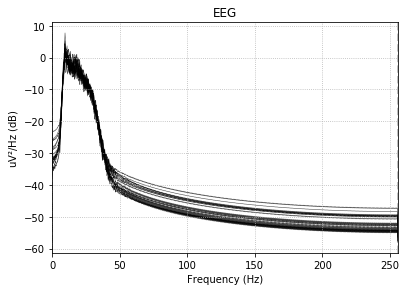

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


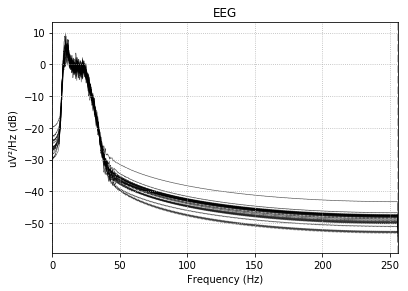

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


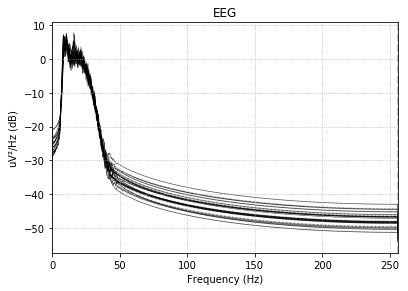

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


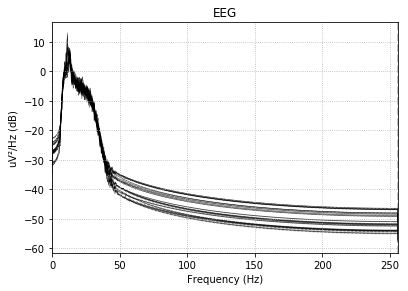

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


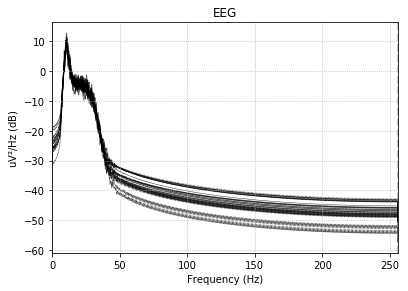

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


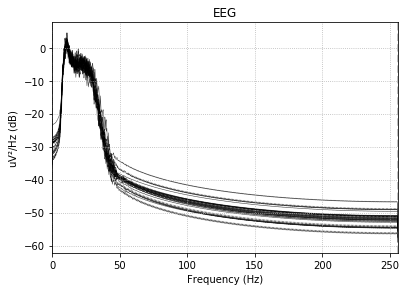

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


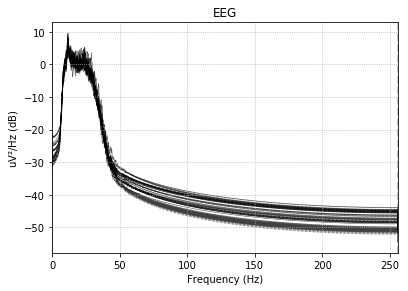

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


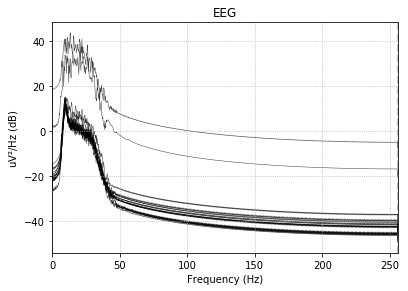

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


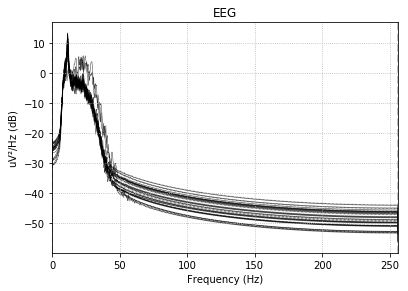

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


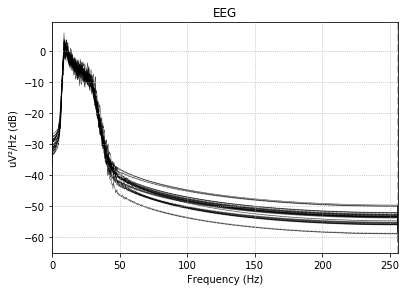

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


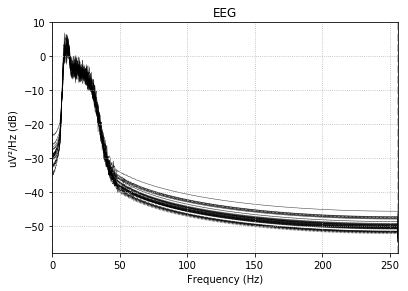

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


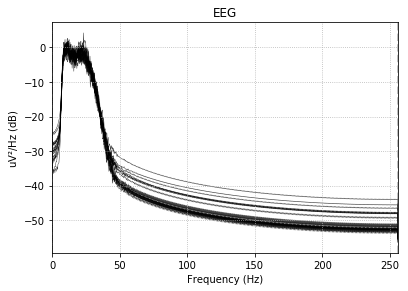

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


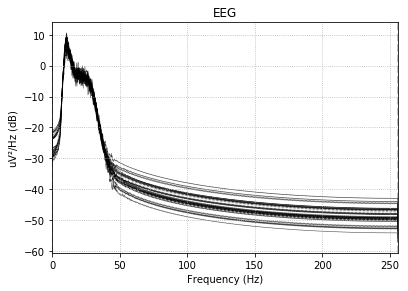

Effective window size : 4.000 (s)


<ipython-input-39-ddd49aa9f7e1>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)


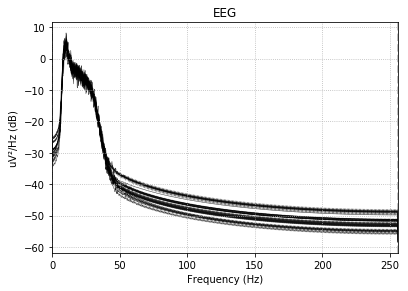

In [39]:
for number,subject in X_all_subjects.items():
    fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)